In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\SathyaBojja\Downloads\archive (1)\loan-train.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.dropna(inplace=True)

# Convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Feature and label
X = df[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Property_Area']]
y = df['Loan_Status']

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("classifiaction_report:",classification_report(y_test,y_pred))

accuracy_score: 0.65625
classifiaction_report:               precision    recall  f1-score   support

           0       0.27      0.11      0.15        28
           1       0.71      0.88      0.78        68

    accuracy                           0.66        96
   macro avg       0.49      0.49      0.47        96
weighted avg       0.58      0.66      0.60        96



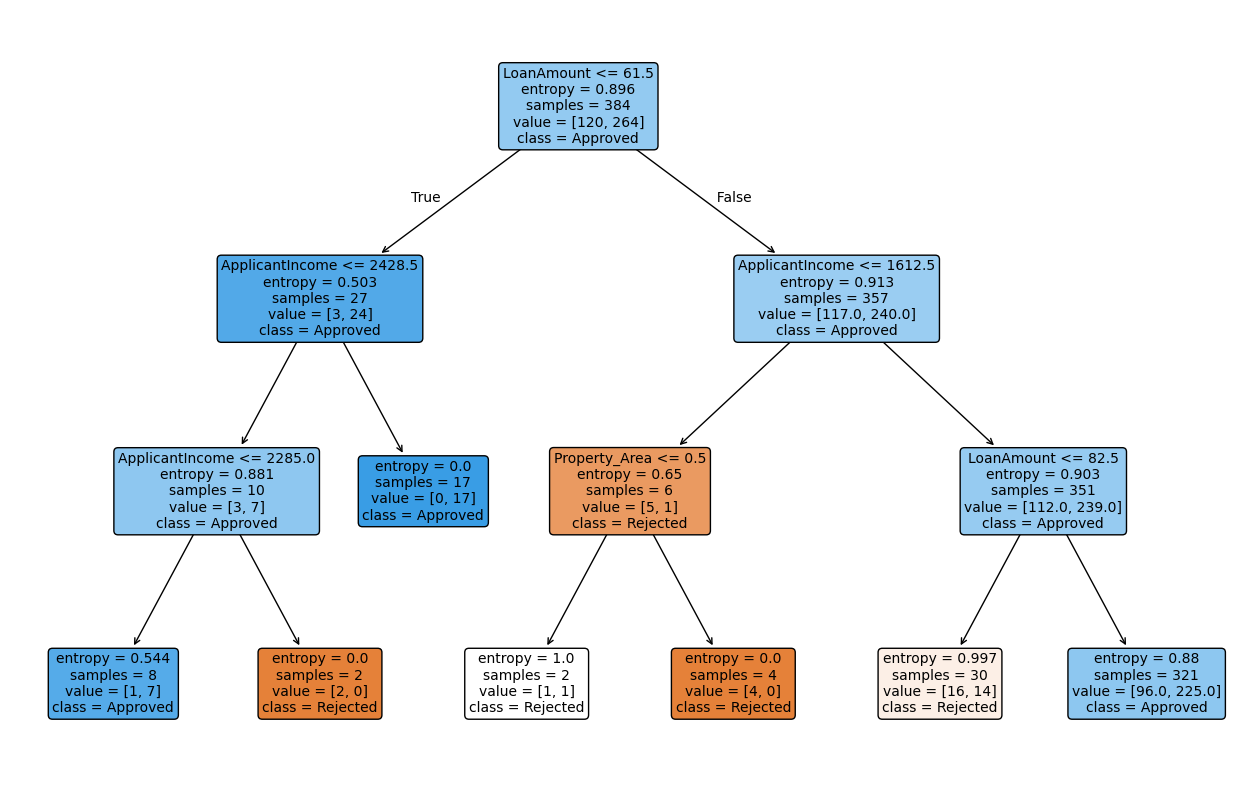

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Rejected", "Approved"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()